In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image
import random
import matplotlib.image as mpimg
from imutils import paths
import sys
import operator

In [ ]:
!pip install rich
!pip install hydra-core
!pip install pytorch-lightning

In [32]:
sys.path.insert(0, "/content/drive/MyDrive/Github_Repos/historia_ml_handwritten_text_line_segmentation")
sys.path.insert(1, "/content/drive/MyDrive/Github_Repos/historia_ml_handwritten_text_line_segmentation/src/utils")

In [33]:
from src.utils.display_image_from_path import img_show

In [3]:
pages_path = "/content/drive/MyDrive/Images/Image Lines/ESADEFENDI"
pages = os.listdir(pages_path)
sheet_paths = []
for page in pages:
  sheet_paths.append(pages_path+"/"+page)
sheet_paths

['/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/3 Lines']

In [4]:
subpages = []
for path in sheet_paths:
  page_parts = os.listdir(path)
  page_parts_paths = []
  for part in page_parts:
    page_parts_paths.append(path+"/"+part)
  subpages.append(page_parts_paths)
subpages

[['/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left',
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right'],
 ['/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/3 Lines/page_left',
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/3 Lines/page_right']]

In [ ]:
lines = []
for page in subpages:
  for part in page:
    page_lines = os.listdir(part)
    lines_path = []
    for line in page_lines:
      lines_path.append(part+"/"+line)
    lines.append(lines_path)
lines

In [41]:
def get_paths_of_lines_and_pages(book_path):
  book = os.listdir(book_path)
  sheet_paths = []
  subpages = []
  lines = []
  for page in book:
    sheet_paths.append(book_path+"/"+page)

  for path in sheet_paths:
    page_parts = os.listdir(path)
    page_parts_paths = []
    for part in page_parts:
      page_parts_paths.append(path+"/"+part)
    subpages.append(page_parts_paths)

  for page in subpages:
    sheet = []
    for part in page:
      page_lines = os.listdir(part)
      lines_path = []
      for line in page_lines:
        lines_path.append(part+"/"+line)
      sheet.append(lines_path)
    lines.append(sheet)

  return {
      "sheet_paths": sheet_paths,
      "subpage_paths": subpages,
      "line_paths": lines
  }

In [42]:
book_paths = get_paths_of_lines_and_pages(pages_path)

In [43]:
book_paths["sheet_paths"]

['/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/3 Lines']

In [44]:
book_paths["subpage_paths"]

[['/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left',
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right'],
 ['/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/3 Lines/page_left',
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/3 Lines/page_right']]

In [49]:
book_paths["line_paths"][0][0]

['/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_19.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_21.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_18.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_26.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_22.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_2.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_14.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_25.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_17.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_23.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_5.png',
 '/content/drive/MyDriv

In [51]:
line = lines[0][0]
line

'/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_left/2_line_19.png'

In [7]:
split_line = line.split("/")
split_line

['',
 'content',
 'drive',
 'MyDrive',
 'Images',
 'Image Lines',
 'ESADEFENDI',
 '2 Lines',
 'page_left',
 '2_line_19.png']

In [8]:
line_name = split_line[-1]
line_name

'2_line_19.png'

In [9]:
line_num = line_name.split("_")[-1].split(".")[0]
line_num

'19'

In [12]:
def get_line_num(line_path):
  return int(line_path.split("/")[-1].split("_")[-1].split(".")[0])

In [13]:
get_line_num(lines[0][0])

19

In [52]:
right_page1 = book_paths["line_paths"][0][1]
right_page1

['/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_1.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_23.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_14.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_6.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_3.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_27.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_7.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_22.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_2.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_19.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_24.png',
 '/content/driv

In [53]:
right_page1_line_nums = []
for path in right_page1:
  right_page1_line_nums.append(get_line_num(path))
right_page1_line_nums

[1,
 23,
 14,
 6,
 3,
 27,
 7,
 22,
 2,
 19,
 24,
 12,
 26,
 4,
 9,
 18,
 5,
 16,
 17,
 13,
 15,
 10,
 8,
 21,
 25,
 11,
 20]

In [54]:
line_path_and_line_num_zip = list(zip(right_page1_line_nums, right_page1))
line_path_and_line_num_zip

[(1,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_1.png'),
 (23,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_23.png'),
 (14,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_14.png'),
 (6,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_6.png'),
 (3,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_3.png'),
 (27,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_27.png'),
 (7,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_7.png'),
 (22,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_22.png'),
 (2,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_2.png'),
 (19,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_19.png'),
 (24,
  '/content/drive/MyDriv

In [55]:
sorted_zip_list_by_line_num = sorted(line_path_and_line_num_zip, key = operator.itemgetter(0))
sorted_zip_list_by_line_num

[(1,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_1.png'),
 (2,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_2.png'),
 (3,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_3.png'),
 (4,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_4.png'),
 (5,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_5.png'),
 (6,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_6.png'),
 (7,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_7.png'),
 (8,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_8.png'),
 (9,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_9.png'),
 (10,
  '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_10.png'),
 (11,
  '/content/drive/MyDrive/Images

In [56]:
def sort_line_paths(line_paths):
  line_nums = []
  sorted_line_paths = []
  for path in line_paths:
    line_nums.append(get_line_num(path))
  line_path_and_line_num_zip = list(zip(line_nums, line_paths))
  sorted_zip_list_by_line_num = sorted(line_path_and_line_num_zip, key = operator.itemgetter(0))
  for zipp in sorted_zip_list_by_line_num:
    sorted_line_paths.append(zipp[1])
  return sorted_line_paths

In [58]:
right_page1_sorted_lines = sort_line_paths(book_paths["line_paths"][0][1])
right_page1_sorted_lines

['/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_1.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_2.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_3.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_4.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_5.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_6.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_7.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_8.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_9.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_10.png',
 '/content/drive/MyDrive/Images/Image Lines/ESADEFENDI/2 Lines/page_right/2_line_11.png',
 '/content/drive/My

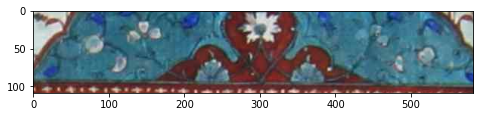

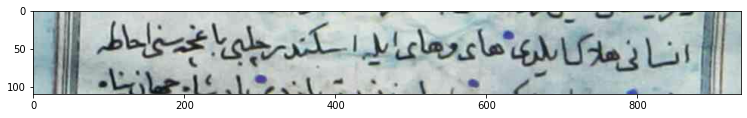

In [60]:
img_path = right_page1_sorted_lines[1]
img2_path = right_page1[1]
img_show(img_path)
img_show(img2_path)